In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)

In [4]:
response=llm.invoke("what is length of wall of china?")

In [8]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.\n\nI should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.\n\nI also remember that the wall isn't a single continuous structure

In [10]:
print (response.content)

<think>
Okay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.

First, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.

I should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.

I also remember that the wall isn't a single continuous structure. There are sections that 

In [11]:
from langchain.tools import tool

Custom Tools

In [12]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

Inbuilt Tool

In [14]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [15]:
search.invoke("what is the latest update on iphone17 release?")

"The iPhone 17 series is shaping up to be an evolutionary update, focusing on refining existing features rather than introducing innovative changes. Recent leaks indicate that Apple is prioritizing ... Forbes iOS 26 Release Date: Exactly When The New iPhone Software Will Launch By David Phelan. This gives us three possible pairs of dates: Tuesday, Sept. 2 or Wednesday, Sept. 3, Tuesday, Sept. 9 ... New iPhone 17 colors. Rumors of a new color for the iPhone started in April, when Twitter user and leaker Majin Bu (not the Dragon Ball Z character) posted that the iPhone 17 Pro and Pro Max could ... The iPhone 16 line landed a while back now, so unsurprisingly there are numerous iPhone 17 leaks at this point - some of which emerged even before the launch of Apple's latest phones. As such ... The iPhone 17 is already shaping up to be one of its biggest updates in years. From the ultra-slim iPhone 17 Air to a new matte finish, upgraded front cameras, a possible sky blue model and more ..."

Combine Tools

In [19]:
tools=[multiply, add, divide, search]

LLM + Tools

In [20]:
llm_with_tools=llm.bind_tools(tools)

Test LLM with Tools

In [21]:
response=llm_with_tools.invoke("hi")

In [23]:
response.content

'Hello! How can I assist you today?'

In [24]:
response.tool_calls

[]

In [25]:
response=llm_with_tools.invoke("What do you think about iPhone 17 ?")

In [26]:
response.content

''

In [27]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'iPhone 17'},
  'id': 'vy61v140q',
  'type': 'tool_call'}]

In [28]:
response=llm_with_tools.invoke("What is 2 * 2 ?")

In [29]:
response.content

''

In [30]:
response.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 2},
  'id': 'a0e68pwvv',
  'type': 'tool_call'}]

Let's setup building the Agent

In [31]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [32]:
user_query=["What is 2 * 2 ?"]

In [33]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'What is 2 * 2 ?']

In [37]:
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    

In [38]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, END, START

In [56]:
builder=StateGraph(MessagesState)

In [57]:
builder.add_node("llm_decision_step",function_1)

In [58]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000025E450B5D80>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000025E450B6E60>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000025E450B6EF0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [59]:
from langgraph.prebuilt import ToolNode

builder.add_node("tools",ToolNode(tools))

In [60]:
builder.add_edge(START,"llm_decision_step")

In [61]:
from langgraph.prebuilt import tools_condition

builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

In [63]:
builder.add_edge("tools","llm_decision_step")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [65]:
react_graph=builder.compile()

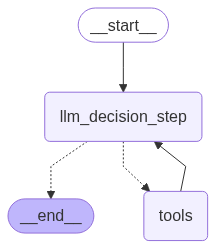

In [66]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [67]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [68]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='5d6b55d9-5208-4988-b066-26bbe020131f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'm6qhj2xgt', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 329, 'prompt_tokens': 423, 'total_tokens': 752, 'completion_time': 1.196363636, 'prompt_time': 0.027150722, 'queue_time': 0.009902623000000003, 'total_time': 1.223514358}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--db24ef4d-104b-498c-ad1b-b8bdef234a16-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'm6qhj2xgt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 329, 'total_tokens': 752}),
  ToolMessage(content="Na

In [73]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [74]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='a4d11761-ebb0-4dbe-ad42-7b3313c44e5f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'a8nd75mdt', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 376, 'prompt_tokens': 427, 'total_tokens': 803, 'completion_time': 1.509528548, 'prompt_time': 0.038792555, 'queue_time': 0.219578634, 'total_time': 1.5483211030000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--15e7c1ac-49ab-4eb4-aa41-e287ab35bb36-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'a8nd75mdt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 376, 'total_tokens':

In [75]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [76]:
response=react_graph.invoke({"messages":message})

In [81]:
response["messages"]

[HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='eede3cfb-1ccb-4781-81e9-e2a25c9c8339'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vd94659ne', 'function': {'arguments': '{"a":299792458,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 516, 'prompt_tokens': 426, 'total_tokens': 942, 'completion_time': 1.931578032, 'prompt_time': 0.033935892, 'queue_time': 0.20410445700000002, 'total_time': 1.9655139240000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--114e0992-5bad-4f1e-8c81-ef7a78038942-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792458, 'b': 10}, 'id': 'vd94659ne', 'type': 'tool_call'}], usage_metadata={'input_tokens': 426, 'output_tokens': 516, 'total_tokens': 942}),
 ToolMessage(content='2997924580', name='mult

In [78]:
response["messages"][-1].content

'The speed of light is approximately 299,792,458 meters per second. When multiplied by 10, the result is:\n\n299,792,458 m/s × 10 = 2,997,924,580 m/s\n\nSo, the final answer is 2,997,924,580 meters per second.'

In [79]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (vd94659ne)
 Call ID: vd94659ne
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================

The speed of light is approximately 299,792,458 meters per second. When multiplied by 10, the result is:

299,792,458 m/s × 10 = 2,997,924,580 m/s

So, the final answer is 2,997,924,580 meters per second.


In [83]:
import yfinance as yf

In [84]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [85]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $201.00.'

In [86]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $322.16.'

In [88]:
tools = [add, multiply, divide, search, get_stock_price]

In [89]:
llm_with_tools=llm.bind_tools(tools)

In [90]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [91]:
response.content

''

In [92]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'cv849qwx0',
  'type': 'tool_call'}]

In [94]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)

def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [95]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

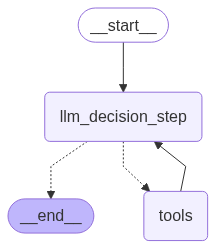

In [96]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [97]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [98]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (7vzm2w8x5)
 Call ID: 7vzm2w8x5
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (ea801xqyy)
 Call ID: ea801xqyy
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================

The current stock price of Apple (AAPL) is **$201.00**. Adding 1000 to this price results in **$1201.00**.


In [99]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [100]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (nhegk7vg4)
 Call ID: nhegk7vg4
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (j1dws4kdd)
 Call ID: j1dws4kdd
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (03djzwq8z)
 Call ID: 03djzwq8z
  Args:
    ticker: AAPL
===========================